#**Unemployment Analysis with Python**

#Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Load the Dataset

In [ ]:
df1=pd.read_csv("/content/Unemployment in India.csv")
df2=pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")

In [ ]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
# Removing spaces before and after the column names
df1.columns = df1.columns.str.strip()
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Descriptive Statistics

In [ ]:
# Descriptive statistics
df1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


Descriptive Statistics Observations :

1.The dataset spans from May 2019 to June 2020, with an average unemployment rate of approximately 11.79% and an average labor participation rate of around 42.63%.

2.Unemployment rates vary widely, ranging from 0% to 76.74%, with significant fluctuations over time, while employed individuals range from approximately 49,420 to 45,777,510

In [ ]:
# Check for missing values
print(df1.isnull().sum())

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


In [ ]:
# Drop rows with missing values
df1 = df1.dropna()

In [ ]:
# check missing values again
print(df1.isnull().sum())

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64


In [ ]:
# Check for duplicates
print(df1.duplicated().sum())

0


In [ ]:
# Summary statistics
print(df1.describe())

# Mean unemployment rate
mean_unemployment = df1['Estimated Unemployment Rate (%)'].mean()
print(f'Mean Unemployment Rate: {mean_unemployment:.2f}%')

# Median unemployment rate
median_unemployment = df1['Estimated Unemployment Rate (%)'].median()
print(f'Median Unemployment Rate: {median_unemployment:.2f}%')

# Standard deviation of unemployment rate
std_unemployment = df['Estimated Unemployment Rate (%)'].std()
print(f'Standard Deviation of Unemployment Rate: {std_unemployment:.2f}%')

       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                                  72.570000  


Unemployment rate over time

In [ ]:
# Adding Day, Month, and Year
df1['Date'] = pd.to_datetime(df['Date'])
df1['Day'] = df1['Date'].dt.day
df1['Month'] = df1['Date'].dt.month_name()
df1['Year'] = df1['Date'].dt.year

# Importing Warnings library
import warnings

# Ignoring unwanted warnings
warnings.filterwarnings("ignore")

df1

<ipython-input-26-b44c1340ba09>:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Date'] = pd.to_datetime(df['Date'])
<ipython-input-26-b44c1340ba09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df['Date'])
<ipython-input-26-b44c1340ba09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Day'] = df1['Date'].dt.day
<ipython-input-26-b44c1340ba09>:4: Se

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,29,February,2020
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,31,March,2020
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,30,April,2020
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,31,May,2020


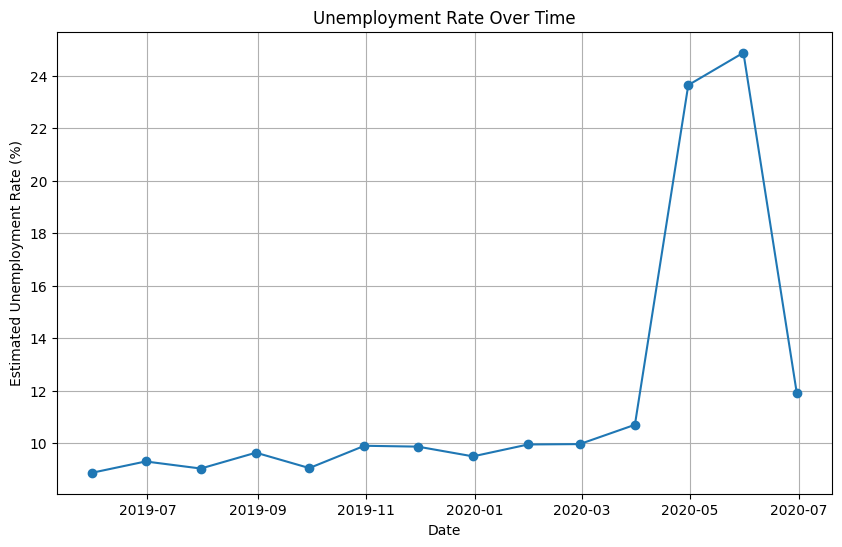

In [ ]:
import matplotlib.pyplot as plt

# Group the data by Date and calculate the mean unemployment rate for each date
mean_unemployment_over_time = df1.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

The plot reveals periods of particularly high unemployment rates, exceeding 20%, in November and December of 2019, followed by another in February of 2020.

In [ ]:
!pip install plotly
import plotly.express as px
# Bar Plot of Average Estimated Unployment Rate
fig = px.bar(df1, x = 'Region', y = "Estimated Unemployment Rate (%)", color = "Region", title = "Average unemploment Rate")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

In [ ]:
# Create the Sunburst plot
fig = px.sunburst(df1, path=['Area', 'Region'], values='Estimated Unemployment Rate (%)', title='Sunburst Plot of Estimated Unemployment Rate by Region and Area')
fig.show()


In [ ]:
# Correlation Analysis
correlation = df1[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()
print(correlation)

                                         Estimated Unemployment Rate (%)  \
Estimated Unemployment Rate (%)                                 1.000000   
Estimated Employed                                             -0.222876   
Estimated Labour Participation Rate (%)                         0.002558   

                                         Estimated Employed  \
Estimated Unemployment Rate (%)                   -0.222876   
Estimated Employed                                 1.000000   
Estimated Labour Participation Rate (%)            0.011300   

                                         Estimated Labour Participation Rate (%)  
Estimated Unemployment Rate (%)                                         0.002558  
Estimated Employed                                                      0.011300  
Estimated Labour Participation Rate (%)                                 1.000000  


In [ ]:
# Example: Test if there is a significant difference in unemployment rates between urban and rural areas
from scipy.stats import ttest_ind

urban_unemployment = df1[df1['Area'] == 'Urban']['Estimated Unemployment Rate (%)']
rural_unemployment = df1[df1['Area'] == 'Rural']['Estimated Unemployment Rate (%)']

t_stat, p_val = ttest_ind(urban_unemployment, rural_unemployment)
print(f'T-Statistic: {t_stat:.2f}')
print(f'P-Value: {p_val:.2f}')


T-Statistic: 3.63
P-Value: 0.00


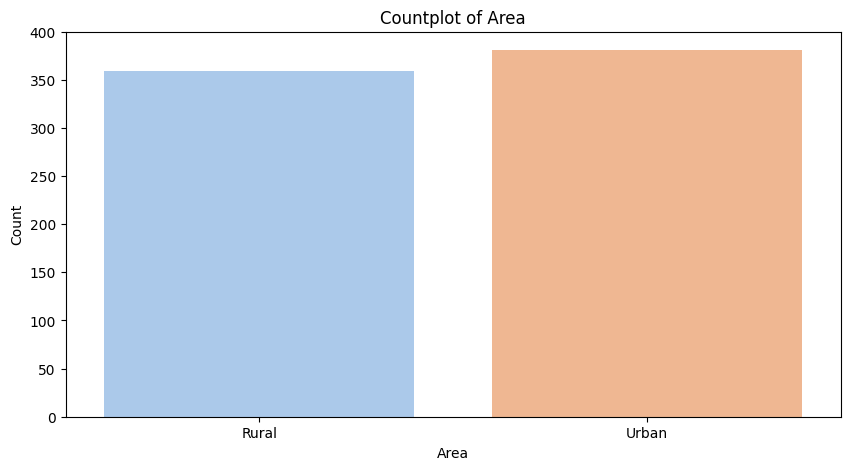

In [ ]:
# make countplot for Area
fig = plt.figure(figsize=(10, 5))
sns.countplot(x='Area', data=df1,palette='pastel')
plt.title('Countplot of Area')
plt.xlabel('Area')
plt.ylabel('Count')
# save the plot
plt.savefig('countplot_area.png', dpi=300)
plt.show()

avg,high,lowest unemployment rate

In [ ]:
avg_unemployment_rate=df1.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
state_with_highest_unemployment=avg_unemployment_rate.idxmax()
high_unemployment_rate=avg_unemployment_rate.max()
state_with_lowest_unemployment=avg_unemployment_rate.idxmin()
low_unemploy_rate=avg_unemployment_rate.min()
print(f"state  with  high employment : {state_with_highest_unemployment}")
print(f"high employment rate : {high_unemployment_rate}")
print(f"state  with  low employment : {state_with_lowest_unemployment}")
print(f"low employment rate : {low_unemploy_rate}")

state  with  high employment : Tripura
high employment rate : 28.350357142857142
state  with  low employment : Meghalaya
low employment rate : 4.7988888888888885


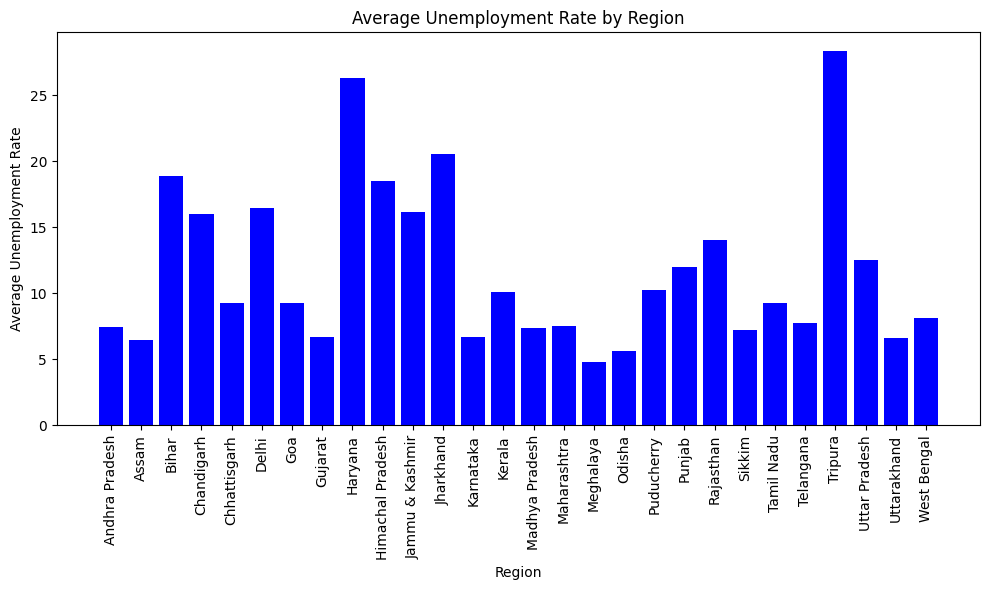

In [ ]:
regions = avg_unemployment_rate.index
avg_rates = avg_unemployment_rate.values

plt.figure(figsize=(10, 6))
plt.bar(regions, avg_rates, color='blue')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

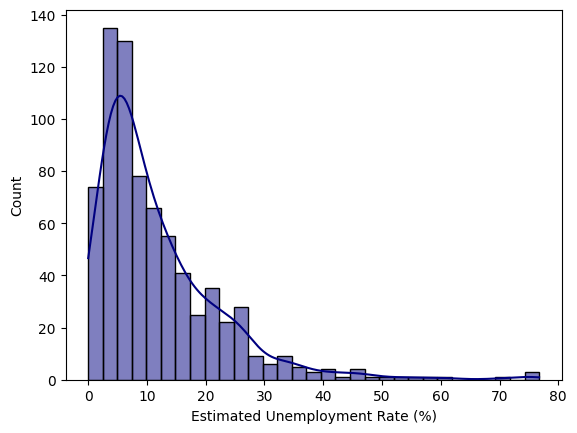

In [ ]:
sns.histplot(data=df1, x="Estimated Unemployment Rate (%)", kde=True,color="navy")
plt.show()

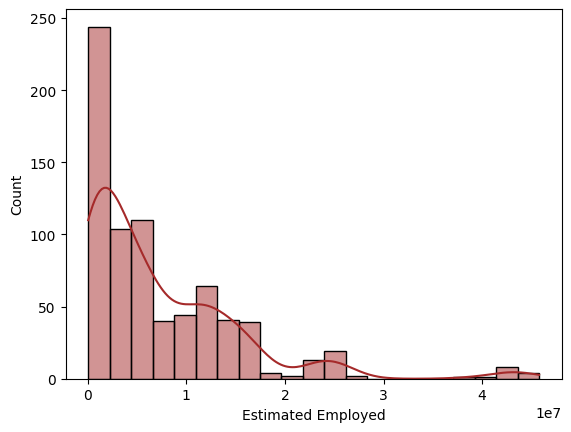

In [ ]:
sns.histplot(data=df1, x="Estimated Employed", kde=True,color="brown")
plt.show()

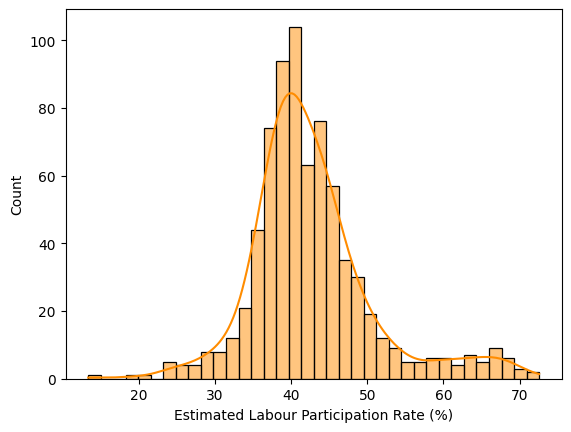

In [ ]:
sns.histplot(data=df1, x="Estimated Labour Participation Rate (%)", kde=True,color="darkorange")
plt.show()

#Unemployment in India (2020)

In [ ]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df2.shape

(267, 9)

In [ ]:
df2.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df2.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


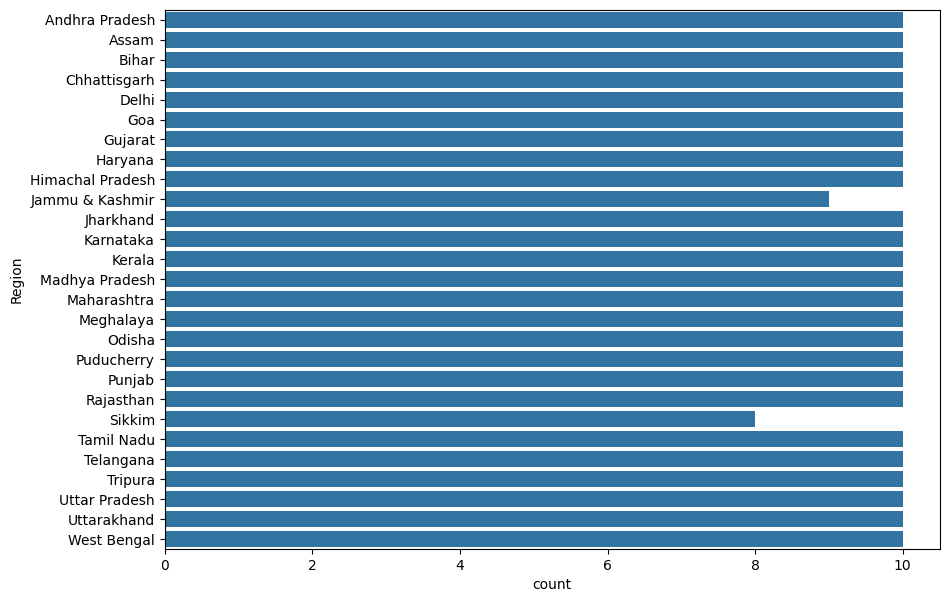

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(y="Region",data=df2)
plt.show()

In [ ]:
import plotly.express as px

# Strip leading/trailing spaces from column names
df2.columns = df2.columns.str.strip()

# Create the bar chart
fig = px.bar(df2,
             x="Region",
             y="Estimated Employed",
             title="Estimated Employed",
             animation_frame='Date', # Changed ' Date' to 'Date'
             template='plotly',
             color="Region.1")
fig.show()

In [ ]:
fig = px.bar(df2, x="Region", y="Estimated Unemployment Rate (%)", title="unemployee rate 2020",
             animation_frame='Date',  # Remove the leading space from ' Date'
             template='plotly',
             color="Region")
fig.show()

In [ ]:
fig = px.bar(df2,
             x="Region",
             y="Estimated Labour Participation Rate (%)", # Corrected column name
             title="labour_rate 2020",
             animation_frame='Date', # Removed leading space in ' Date'
             template='plotly',
             color="Region.1")
fig.show()

Time Series Line Plot for Unemployment Rate by Region

In [ ]:
fig = px.line(df2, x='Date', y="Estimated Unemployment Rate (%)", color='Region.1', # Removed the leading space in ' Date'
                  title='Unemployment Rate Over Time', template='plotly')
fig.show()

Unemployment Rate vs. Estimated Employed

In [ ]:
fig = px.scatter(df2, x='Estimated Employed', y='Estimated Unemployment Rate (%)',
                  color='Region.1', title='Unemployment Rate vs. Estimated Employed',
                  animation_frame="Date")  # Removed the leading space in ' Date'
fig.show()

In [ ]:
df2["Region.1"].value_counts()

,count
Region.1,
North,79
South,60
West,50
East,40
Northeast,38


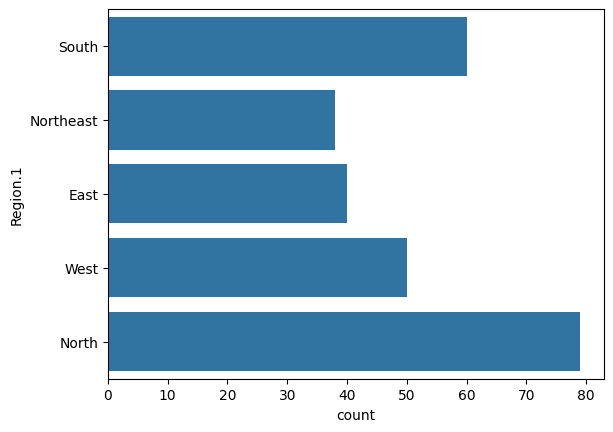

In [ ]:
sns.countplot(y="Region.1",data=df2)
plt.show()

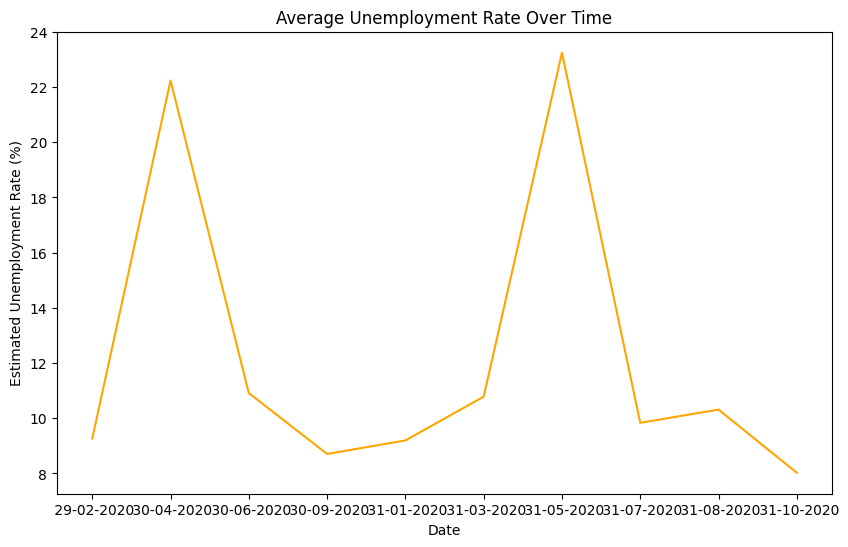

In [ ]:
# Average unemployment rate over time
unemployment_over_time = df2.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Plot unemployment rate over time
plt.figure(figsize=(10, 6))
plt.plot(unemployment_over_time, color='orange')
plt.title("Average Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.show()


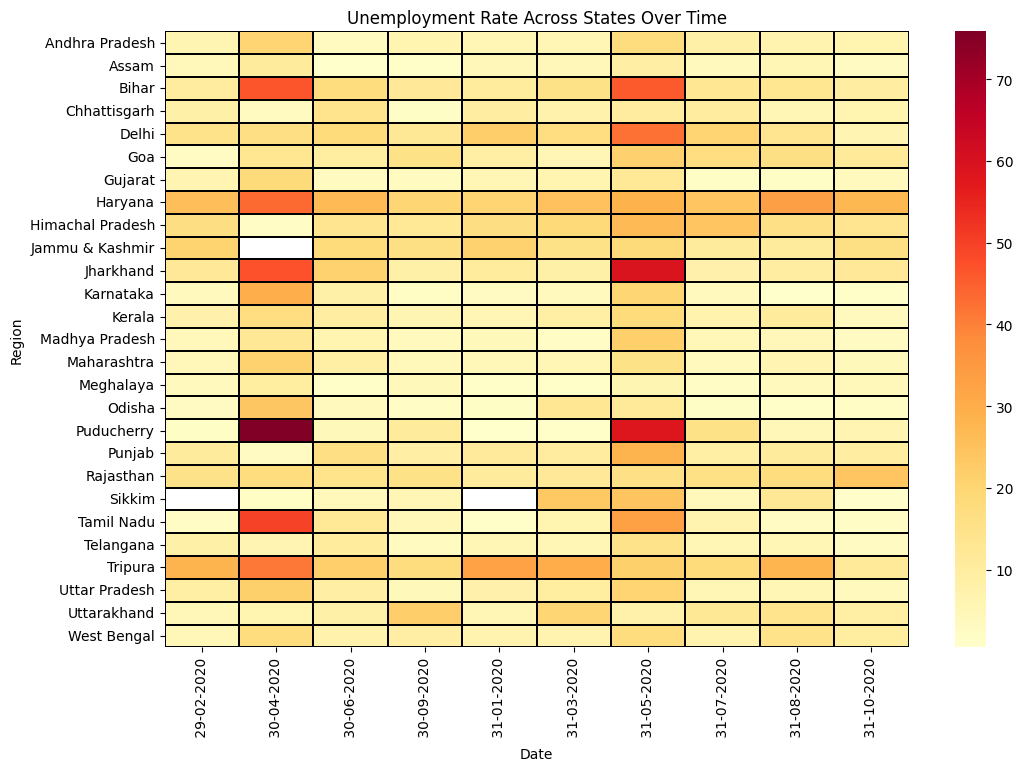

In [ ]:
# Pivot data for heatmap
heatmap_data = df2.pivot(index="Region", columns="Date", values="Estimated Unemployment Rate (%)")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.1, linecolor='black')
plt.title("Unemployment Rate Across States Over Time")
plt.show()

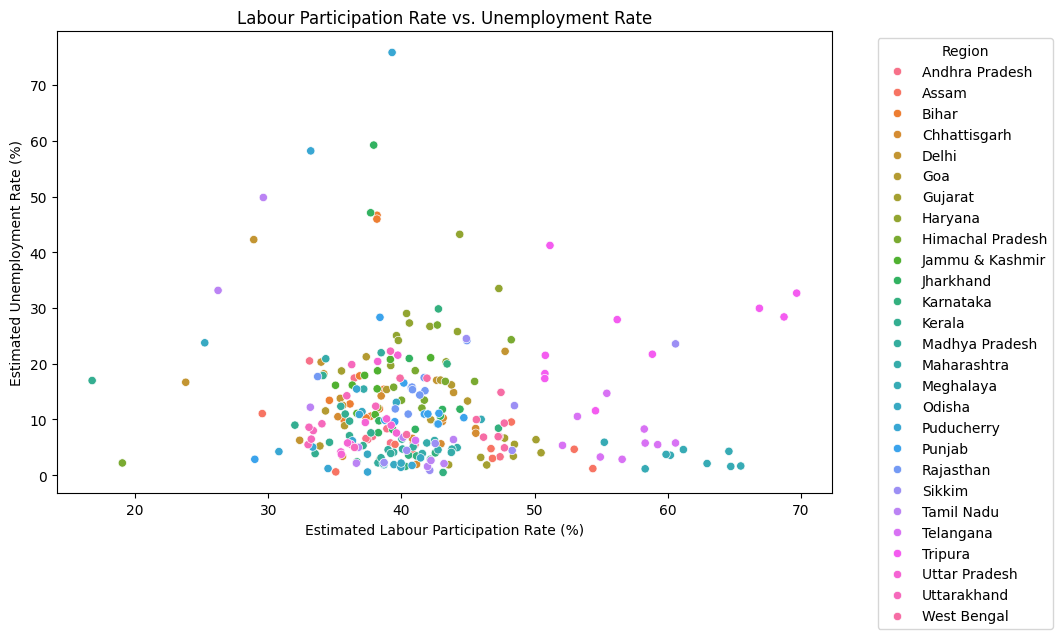

In [ ]:
# Scatter plot of Labour Participation Rate vs. Unemployment Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title("Labour Participation Rate vs. Unemployment Rate")
plt.xlabel("Estimated Labour Participation Rate (%)")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
